# MNIST 

In [7]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In [ ]:
#pip install tensorflow


In [ ]:
#!pip install keras

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

In [1]:
# Importing required libraries 
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train = np.array(train.iloc[:,1:])
y_train = np.array(train.iloc[:,0])

X_test = np.array(test.iloc[:,1:])
y_test = np.array(test.iloc[:,0])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


[51873 24110 23906 11701 49727 18469 26340 29587 25466  8114]


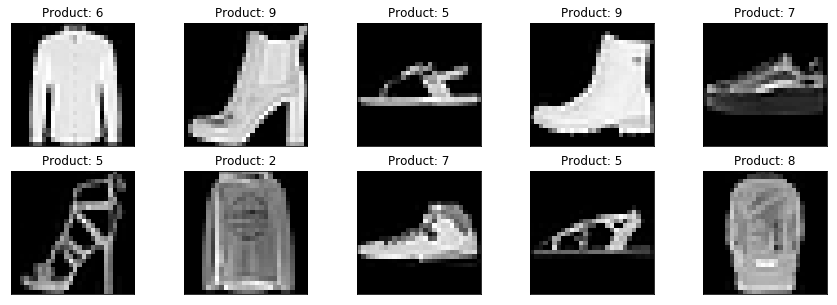

In [5]:
import matplotlib.pyplot as plt    # For plotting 
%matplotlib inline                 

s = np.random.choice(range(X_train.shape[0]), size=10, replace=False)  # Randomly select few samples

print(s)
plt.figure(figsize=(15,5))
for i,j in enumerate(s):   
    plt.subplot(2,5,i+1)                                # Subplot flag
    plt.imshow(np.array(X_train[j]).reshape(28,28))     # Plot the image
    plt.title('Product: ' + str(y_train[j]))              # Target of the image
    plt.xticks([])                                      # No X-Axis ticks
    plt.yticks([])                                      # No Y-Axis ticks
    plt.gray()                                          # For gray scale images 

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot 

In [9]:
# Check the dimensions of the arrays
print('x_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('x_test shape:  {}'.format(X_test.shape))
print('y_test shape:  {}'.format(y_test.shape))

x_train shape: (60000, 784)
y_train shape: (60000, 10)
x_test shape:  (10000, 784)
y_test shape:  (10000, 10)


In [10]:
# 'to_categorical' converts the class lebels to one-hot vectors. One-hot vector is nothing but dummifying in R.
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
# Sequential is a container which stores the layers in order. 
# Think of it as a train engine to which you can keep adding train cars. train car in our context will be a layer.
# 'Dense' is a fully connected layer feedforward layer.
from keras.models import Sequential 
from keras.layers import Dense

In [12]:
# Building a simple MLP   --- building the architecture

model = Sequential() # This initializes a sequential model to which we can keep adding layers.
model.add(Dense(200, kernel_initializer = 'uniform', 
                input_dim = 784, activation = 'relu')) # Add a dense layer  with 200 nodes in the hidden first layer
model.add(Dense(10, kernel_initializer = 'uniform', 
                activation = 'softmax')) # Add output layer  -- In 2nd hidden layer, we have 10 classes/labels

In [13]:
# Setting learning and momentum
# Adam is the optimizer which is the state of the art Gradient Descent variation. 
from keras.optimizers import Adam
adam = Adam(lr=0.001)

model.compile(loss = 'categorical_crossentropy', # CrossEntropy is the loss function - multi class problem
              optimizer = adam,                  # Mention the optimizer
              metrics=['accuracy'])            # Mention the metric to be printed while training

In [14]:
nb_epochs = 200
# training the MLP model
history = model.fit(X_train, y_train, epochs=nb_epochs, batch_size=64, validation_split=0.1) 

ValueError: Error when checking target: expected dense_2 to have 2 dimensions, but got array with shape (60000, 10, 2)

In [12]:
train_acc = history.history['acc']
train_loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

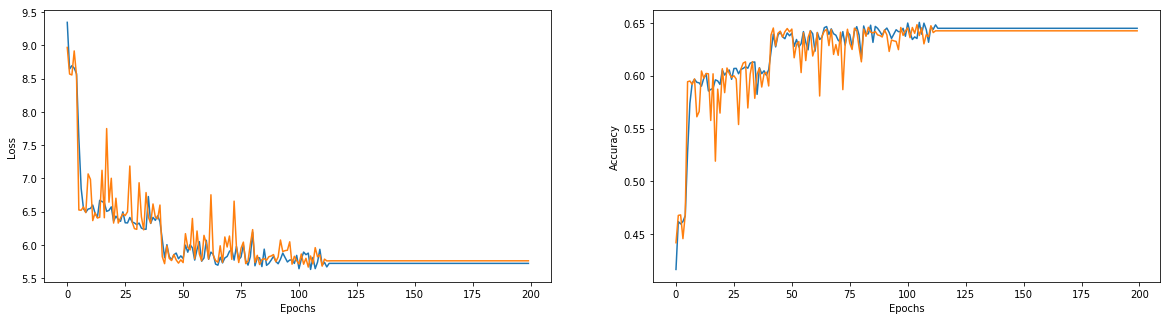

In [13]:
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)

In [15]:
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 43us/step


[5.7966647468566892, 0.64029999999999998]

### Activity

1. Get the output of final layer on test data. What are it's dimensions? What do those values represent?

2. Get the class predictions for test data

3. Compute the Accuracy of the model on test data

HINT: Check model.predict, model.predict_classes, model.evaluate 

### Activity

1. Note down the accuracies for various number of nodes if the hidden layer and make a plot for the same

2. Note down the accuracies for various learning rate values make a plot for the same

HINT: Please check the plotting code above and explore matplotlib further if needed. Don't be afraid to explore on your own if needed and don't restrict yourself only to the material given in class. 

In [ ]:
# Psuedocode
# Hidden Nodes Vs. Accuracy
hidden_list = []
acc_list = []
for l in hidden_list:
    # Train the model for these hidden nodes
    # Evaluate the model on test data
    # Append the accuracy on test data to 'acc_list'

# Plot values in hidden_list Vs. values in 'acc_list'
# Name the plot accordingly and label the axis properly

In [ ]:
# Psuedocode
# Learning Rate Vs. Accuracy
lr_list = []
acc_list = []
for l in lr_list:
    # Train the model for this learning rate
    # Evaluate the model on test data
    # Append the accuracy on test data to 'acc_list'

# Plot values in lr_list Vs. values in 'acc_list'
# Name the plot accordingly and label the axis properly